In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv('C:/Users/hp/Datasets/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [107]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Exploratory Data Analysis

<AxesSubplot:xlabel='charges', ylabel='Density'>

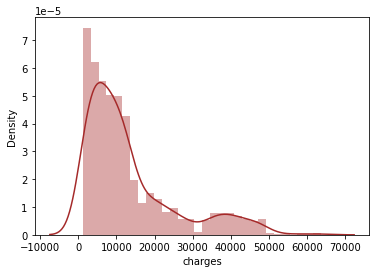

In [14]:
sns.distplot(df.charges,color= 'brown')

In [109]:
#encodeyes no to 1,0
#df.smoker = df.smoker.eq('yes').mul(1)

In [110]:
from scipy.stats import skew

In [111]:
df['bmi'].skew()

0.2840471105987448

In [112]:
df.head()
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

### Data preperation

In [113]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [114]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [115]:
# 3 Tasks to be done in scaling
# 1) convert binary categor. feature to 0,1 - use def fn. or any approach
# 2) multiple categor. feature use dummifying 
# 3) once all feature values numerical, apply minmax scaling

#### Label encoder not good to use in linear regression 

In [116]:
#from sklearn.preprocessing import LabelEncoder
#le= LabelEncoder()
# import labelencoder -> make list categor.feat. -> apply labelencodin on that

In [117]:
l= ['sex','smoker']

In [118]:
#for feature in l:
#    df[feature] = le.fit_transform(df[feature])

In [119]:
# SO WE ARE USING USER DEFINED Encoding method.

In [5]:
# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0,'male': 1,'female': 0})


In [6]:
l= ['sex','smoker']

In [7]:
df[l]= df[l].apply(binary_map)

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [9]:
region_dummy= pd.get_dummies(df['region'],drop_first= True)
region_dummy.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [10]:
# Concatnating dummified colms
df=pd.concat([df,region_dummy],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [11]:
df=df.drop(columns='region')
df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [12]:
import seaborn as sns

In [13]:
#just checkin correlation
#cr= df.corr()
#sns.heatmap(df,annot= True)

In [14]:
# dividing data into train,test... 
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test = train_test_split(df,train_size= 0.7, test_size= 0.3, random_state= 100)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [16]:
num_var=['age','bmi','children']
df_train[num_var] = scaler.fit_transform(df_train[num_var])

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [17]:
df_train.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
966,0.717391,1,0.237692,0.4,1,23967.38305,1,0,0
522,0.717391,0,0.483051,0.0,0,9866.30485,0,0,0
155,0.565217,1,0.633844,0.0,0,6948.70080,1,0,0
671,0.239130,0,0.408932,0.0,0,3943.59540,0,0,0
1173,0.434783,1,0.357815,0.4,0,6457.84340,1,0,0


<AxesSubplot:>

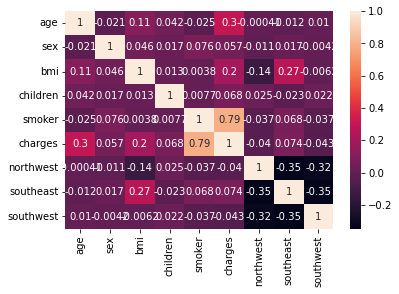

In [18]:
#just checkin correlation
cr= df.corr()
sns.heatmap(cr,annot= True)

In [19]:
# Building model

df_train.shape   #(936, 9)
df_test.shape    #(402, 9)

(402, 9)

### Dividing x,y

In [20]:
y_train= df_train.pop('charges')
y_train[:4]

966    23967.38305
522     9866.30485
155     6948.70080
671     3943.59540
Name: charges, dtype: float64

In [21]:
x_train= df_train

#### Building model usin RFE Feature selection method + manual 

In [60]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [61]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [62]:
# we have total 8 features, let's ask rfe to give output for all 8
rfe= RFE(lm,6)
rfe_model= rfe.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [63]:
list(zip(x_train.columns, rfe_model.support_, rfe_model.ranking_))

# as we change no.of features in RFE(n) less n, then ranking classifies features more as per their importance  

[('age', True, 1),
 ('sex', False, 3),
 ('bmi', True, 1),
 ('children', True, 1),
 ('smoker', True, 1),
 ('northwest', False, 2),
 ('southeast', True, 1),
 ('southwest', True, 1)]

In [64]:
col= x_train.columns[rfe_model.support_]
col

Index(['age', 'bmi', 'children', 'smoker', 'southeast', 'southwest'], dtype='object')

In [65]:
x_train_rfe = x_train[col]

In [66]:
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [67]:
lm= sm.OLS(y_train,x_train_rfe).fit()

In [69]:
lm.summary() # adj.Rsq. (8-0.736, 4-0.735, 6- 0.736, 3- 0.713) (but AIC,BIC - are high)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     434.8
Date:                Sat, 09 Jul 2022   Prob (F-statistic):          1.07e-265
Time:                        16:27:24   Log-Likelihood:                -9503.8
No. Observations:                 936   AIC:                         1.902e+04
Df Residuals:                     929   BIC:                         1.906e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1328.2307    622.941     -2.132      0.033   -2550.765    -105.696
age         1.195e+04    673.001     17.755      0.000    1.06e+04    1.33e+04
bmi         1.076e+04   1288.081      8.352      0.000    8229.962    1.33e+04
children    2323.0602    847.572      2.741      0.006     659.683    3986.437
smoker        2.4e+04    517.287     46.399      0.000     2.3e+04     2.5e+04
southeast   -552.8548    509.183     -1.086      0.278   -1552.136     446.427
southwest  -1211.9786    512.291     -2.366      0.018   -2217.360    -206.597
==============================================================================
Omnibus:                      222.427   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              529.012
Skew:                           1.265   Prob(JB):                    1.34e-115
Kurtosis:                       5.677   Cond. No.                         8.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.33
5,southeast,1.26
6,southwest,1.16
2,bmi,1.11
1,age,1.02
4,smoker,1.01
3,children,1.00


In [147]:
# drop var. insignificat

In [72]:
# dropping 'sex'
x_train_rfe= x_train_rfe.drop('southeast',axis= 1)

In [73]:
# again fittin mpdel
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [74]:
lm = sm.OLS(y_train, x_train_rfe).fit()

In [75]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     521.4
Date:                Sat, 09 Jul 2022   Prob (F-statistic):          8.06e-267
Time:                        16:27:51   Log-Likelihood:                -9504.4
No. Observations:                 936   AIC:                         1.902e+04
Df Residuals:                     930   BIC:                         1.905e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1382.1606    621.017     -2.226      0.026   -2600.918    -163.403
age         1.199e+04    672.242     17.829      0.000    1.07e+04    1.33e+04
bmi         1.034e+04   1230.710      8.405      0.000    7929.397    1.28e+04
children    2348.6850    847.324      2.772      0.006     685.795    4011.574
smoker      2.395e+04    515.555     46.464      0.000    2.29e+04     2.5e+04
southwest  -1006.9214    476.254     -2.114      0.035   -1941.579     -72.264
==============================================================================
Omnibus:                      221.599   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              525.236
Skew:                           1.262   Prob(JB):                    8.84e-115
Kurtosis:                       5.665   Cond. No.                         8.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# drioping 'northwest'
x_train_rfe = x_train_rfe.drop('southwest',axis= 1)

In [77]:
# again fittin mpdel
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [78]:
lm = sm.OLS(y_train, x_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     648.2
Date:                Sat, 09 Jul 2022   Prob (F-statistic):          2.76e-267
Time:                        16:28:45   Log-Likelihood:                -9506.6
No. Observations:                 936   AIC:                         1.902e+04
Df Residuals:                     931   BIC:                         1.905e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1600.8593    613.482     -2.609      0.009   -2804.827    -396.891
age         1.195e+04    673.272     17.747      0.000    1.06e+04    1.33e+04
bmi         1.033e+04   1232.986      8.379      0.000    7912.026    1.28e+04
children    2307.2610    848.675      2.719      0.007     641.723    3972.799
smoker      2.398e+04    516.340     46.448      0.000     2.3e+04     2.5e+04
==============================================================================
Omnibus:                      222.839   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              527.759
Skew:                           1.269   Prob(JB):                    2.50e-115
Kurtosis:                       5.663   Cond. No.                         7.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# dropoing 'southwest'
x_train_rfe= x_train_rfe.drop('children',axis= 1)

In [80]:
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [81]:
lm = sm.OLS(y_train, x_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     856.0
Date:                Sat, 09 Jul 2022   Prob (F-statistic):          3.43e-267
Time:                        16:29:23   Log-Likelihood:                -9510.3
No. Observations:                 936   AIC:                         1.903e+04
Df Residuals:                     932   BIC:                         1.905e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1171.8246    594.866     -1.970      0.049   -2339.257      -4.392
age         1.202e+04    675.097     17.802      0.000    1.07e+04    1.33e+04
bmi         1.045e+04   1236.471      8.449      0.000    8020.778    1.29e+04
smoker      2.399e+04    518.093     46.311      0.000     2.3e+04     2.5e+04
==============================================================================
Omnibus:                      217.990   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              503.204
Skew:                           1.254   Prob(JB):                    5.38e-110
Kurtosis:                       5.572   Cond. No.                         7.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
# dropoing 'southeast'
#x_train_rfe= x_train_rfe.drop('southeast',axis= 1)

In [159]:
#import statsmodels.api as sm
#x_train_rfe = sm.add_constant(x_train_rfe)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [82]:
#lm = sm.OLS(y_train, x_train_rfe).fit()
#lm.summary()

In [83]:
# adj.r_sq: 0.735
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.42
1,age,1.01
2,bmi,1.01
3,smoker,1.00


In [84]:
# predict
y_train_pred = lm.predict(x_train_rfe)

In [85]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

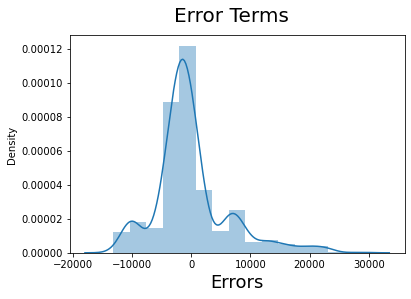

In [88]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 15)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<AxesSubplot:xlabel='charges'>

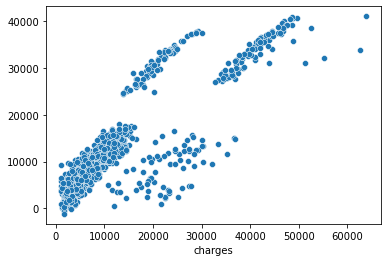

In [91]:
sns.scatterplot(x= y_train,y= y_train_pred)
# predicted points are dispersed around non uniformly so it's also a residual terms

### applyin prediction on test set

In [166]:
# applying scsaling on test set

In [89]:
df_test.head()
# but only featres from RFE after all removl final: x_train_rfe 

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
12,23,1,34.400,0,0,1826.84300,0,0,1
306,28,0,27.500,2,0,20177.67113,0,0,1
318,44,0,27.645,0,0,7421.19455,1,0,0
815,20,0,31.460,0,0,1877.92940,0,1,0
157,18,1,25.175,0,1,15518.18025,0,0,0


In [93]:
# only features to be used
num = ['age','bmi','smoker']

In [94]:

df_test[num] = scaler.transform(df_test[num])

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [95]:
y_test = df_test.pop('charges')
x_test = df_test[num]

In [97]:
x_test.head()
y_test.head()

12      1826.84300
306    20177.67113
318     7421.19455
815     1877.92940
157    15518.18025
Name: charges, dtype: float64

In [98]:
# Creating X_test_new dataframe by dropping variables from X_test
#x_test_new = x_test[x_train_rfe.columns]

# Adding a constant variable 
x_test = sm.add_constant(x_test)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [99]:
y_test_pred = lm.predict(x_test)

### Plotting y_test and y_pred to understand the spread.

Text(0, 0.5, 'y_tp')

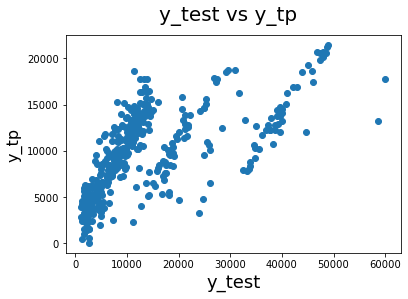

In [101]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_tp', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_tp', fontsize=16)                          # Y-label

#### note : Find performance parameters/ metrics for regrssion problems put in Table
like: RMSE,MSE,etc

In [ ]:
# Obtain the performance metrics
from sklearn.metrics import mean_squared_error

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))), 2))

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

In [ ]:
# Compare predicted and actual values

df_comp = pd.DataFrame({'Actual': np.round(y_test, 2), 
                   'Predicted': np.round(y_pred, 2)})
df_comp.head(10)

In [ ]:
# Anlysis of residuals
sns.histplot(lr_sm.resid)